In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_df=pd.read_csv('/content/train.csv')
test_df=pd.read_csv('/content/test.csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Moran, Mr. Daniel J",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
train_df[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [8]:
train_df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [9]:
train_df[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [10]:
train_df[['SibSp', 'Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [11]:
train_df[['Parch', 'Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([30., 14., 10., 14.,  3., 29., 39., 65., 73., 42., 65., 62., 33.,
        47., 38., 21., 28., 21., 16., 14., 15.,  7.,  9.,  8.,  4.,  0.,
         5.,  1.,  0.,  1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <a list of 30 Patch objects>)

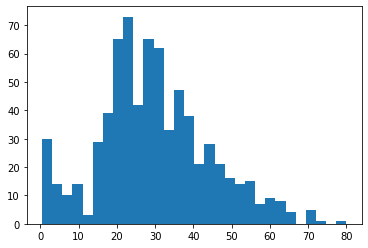

In [12]:
plt.hist(train_df['Age'], bins=30)

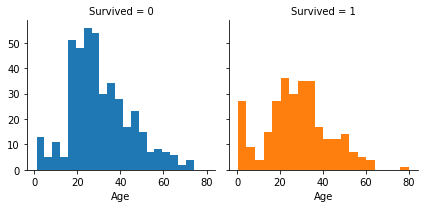

In [13]:
grid = sns.FacetGrid(train_df,col='Survived',hue='Survived')
grid.map(plt.hist,'Age',bins=20)

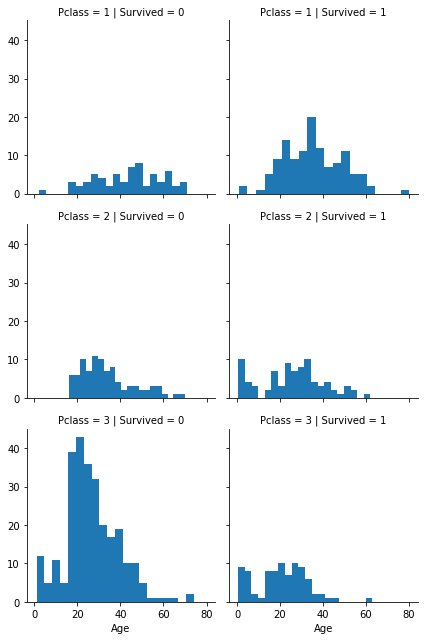

In [14]:
grid=sns.FacetGrid(train_df,row='Pclass',col='Survived')
grid.map(plt.hist,'Age',bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


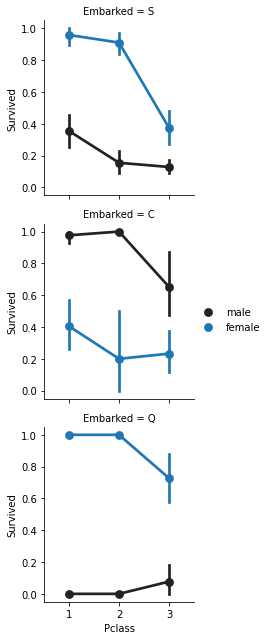

In [15]:
grid=sns.FacetGrid(train_df,row='Embarked')
grid.map(sns.pointplot,'Pclass','Survived','Sex')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


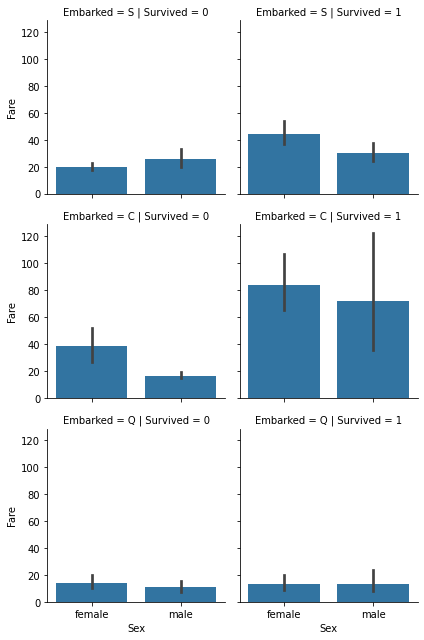

In [16]:
grid=sns.FacetGrid(train_df,row='Embarked',col='Survived')
grid.map(sns.barplot,'Sex','Fare')

In [17]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
combine=[train_df,test_df]

In [20]:
for dataset in combine:
  dataset['Title']=dataset['Name'].str.extract((' ([A-Za-z]+)\. '))

In [21]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [22]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [23]:
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [24]:
for dataset in combine:
  dataset['Title']=dataset['Title'].replace(['Capt', 'Lady', 'Countess', 'Col', 
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'],'Other')
  dataset['Title']=dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title']=dataset['Title'].replace('Ms', 'Miss')
  dataset['Title']=dataset['Title'].replace('Mme', 'Mrs')

In [25]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [26]:
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Other,3,20


In [27]:
train_df[['Title','Survived']].groupby('Title',as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [28]:
title_column={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Other':5}
for dataset in combine:
  dataset['Title']=dataset['Title'].map(title_column)
  dataset['Title']=dataset['Title'].fillna(0)

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [30]:
train_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [31]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,5
887,1,1,female,19.0,0,0,30.0000,S,2
888,0,3,female,NaN,1,2,23.4500,S,2
889,1,1,male,26.0,0,0,30.0000,C,1


In [32]:
test_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [33]:
for dataset in combine:
  dataset['Sex']=dataset['Sex'].replace({'male':0,'female':1})

In [34]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,5
887,1,1,1,19.0,0,0,30.0000,S,2
888,0,3,1,NaN,1,2,23.4500,S,2
889,1,1,0,26.0,0,0,30.0000,C,1


In [35]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [36]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        0
dtype: int64

In [37]:
for dataset in combine:
  dataset['Age'].fillna(dataset['Age'].mean(),inplace=True)
  dataset['Age']=dataset['Age'].astype(int)

In [38]:
train_df['Age'].isnull().sum()

0

In [39]:
test_df['Age'].isnull().sum()

0

In [40]:
train_df['AgeBand']=pd.cut(train_df['Age'],5)

In [41]:
train_df['AgeBand'].unique()

[(16.0, 32.0], (32.0, 48.0], (48.0, 64.0], (-0.08, 16.0], (64.0, 80.0]]
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] <
                                    (64.0, 80.0]]

In [42]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,1,"(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,S,5,"(16.0, 32.0]"
887,1,1,1,19,0,0,30.0000,S,2,"(16.0, 32.0]"
888,0,3,1,29,1,2,23.4500,S,2,"(16.0, 32.0]"
889,1,1,0,26,0,0,30.0000,C,1,"(16.0, 32.0]"


In [43]:
for dataset in combine:
  dataset.loc[dataset['Age']<=16,'Age']=0
  dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32),'Age']=1
  dataset.loc[(dataset["Age"]>32) & (dataset['Age']<=48),'Age']=2
  dataset.loc[(dataset["Age"]>48) & (dataset['Age']<=64),'Age']=3
  dataset.loc[(dataset["Age"]>64) & (dataset['Age']<=80),'Age']=4

In [44]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S,5,"(16.0, 32.0]"
887,1,1,1,1,0,0,30.0000,S,2,"(16.0, 32.0]"
888,0,3,1,1,1,2,23.4500,S,2,"(16.0, 32.0]"
889,1,1,0,1,0,0,30.0000,C,1,"(16.0, 32.0]"


In [45]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
AgeBand     0
dtype: int64

In [46]:
train_df[train_df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
61,1,1,1,2,0,0,80.0,NaN,2,"(32.0, 48.0]"
829,1,1,1,3,0,0,80.0,NaN,3,"(48.0, 64.0]"


In [47]:
train_df[(train_df['Survived']==1) & (train_df['Pclass']==1) & (train_df['Sex']==1)]['Embarked'].value_counts()

S    46
C    42
Q     1
Name: Embarked, dtype: int64

In [48]:
train_df['Embarked'].fillna('S', inplace=True)

In [49]:
train_df['Embarked'].isnull().sum()

0

In [50]:
train_df['Embarked']=train_df['Embarked'].astype(str)

In [51]:
for dataset in combine:
  dataset['Embarked']=dataset['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [52]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,0,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,1,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,0,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,0,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,0,1,"(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,0,5,"(16.0, 32.0]"
887,1,1,1,1,0,0,30.0000,0,2,"(16.0, 32.0]"
888,0,3,1,1,1,2,23.4500,0,2,"(16.0, 32.0]"
889,1,1,0,1,0,0,30.0000,1,1,"(16.0, 32.0]"


In [53]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
AgeBand     0
dtype: int64

In [54]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
Title       0
dtype: int64

In [55]:
test_df[test_df['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
152,3,0,3,0,0,NaN,0,1.0


In [60]:
test_df[(test_df['Pclass']==3)]['Fare'].mean()

12.459677880184334

In [61]:
test_df['Fare'].fillna(12.459678, inplace=True)

In [62]:
train_df['FareBand']=pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby('FareBand',as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [63]:
for dataset in combine:
  dataset.loc[dataset['Fare']<=7.91,'Fare']=0
  dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454),'Fare']=1
  dataset.loc[(dataset["Fare"]>14.454) & (dataset['Fare']<=31),'Fare']=2
  dataset.loc[(dataset["Fare"]>31) & (dataset['Fare']<=512.329),'Fare']=3

In [64]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FareBand
0,0,3,0,1,1,0,0.0,0,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,1,1,1,2,1,0,3.0,1,3,"(32.0, 48.0]","(31.0, 512.329]"
2,1,3,1,1,0,0,1.0,0,2,"(16.0, 32.0]","(7.91, 14.454]"
3,1,1,1,2,1,0,3.0,0,3,"(32.0, 48.0]","(31.0, 512.329]"
4,0,3,0,2,0,0,1.0,0,1,"(32.0, 48.0]","(7.91, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,1.0,0,5,"(16.0, 32.0]","(7.91, 14.454]"
887,1,1,1,1,0,0,2.0,0,2,"(16.0, 32.0]","(14.454, 31.0]"
888,0,3,1,1,1,2,2.0,0,2,"(16.0, 32.0]","(14.454, 31.0]"
889,1,1,0,1,0,0,2.0,1,1,"(16.0, 32.0]","(14.454, 31.0]"


In [65]:
for dataset in combine:
  dataset['Family']=dataset['SibSp']+dataset['Parch']
  dataset['Family']=dataset['Family'].astype(int)

In [66]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FareBand,Family
0,0,3,0,1,1,0,0.0,0,1,"(16.0, 32.0]","(-0.001, 7.91]",1
1,1,1,1,2,1,0,3.0,1,3,"(32.0, 48.0]","(31.0, 512.329]",1
2,1,3,1,1,0,0,1.0,0,2,"(16.0, 32.0]","(7.91, 14.454]",0
3,1,1,1,2,1,0,3.0,0,3,"(32.0, 48.0]","(31.0, 512.329]",1
4,0,3,0,2,0,0,1.0,0,1,"(32.0, 48.0]","(7.91, 14.454]",0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,1.0,0,5,"(16.0, 32.0]","(7.91, 14.454]",0
887,1,1,1,1,0,0,2.0,0,2,"(16.0, 32.0]","(14.454, 31.0]",0
888,0,3,1,1,1,2,2.0,0,2,"(16.0, 32.0]","(14.454, 31.0]",3
889,1,1,0,1,0,0,2.0,1,1,"(16.0, 32.0]","(14.454, 31.0]",0


In [67]:
train_df.drop(['AgeBand', 'FareBand', 'SibSp', 'Parch'], axis=1,inplace=True)

In [68]:
test_df.drop(['SibSp', 'Parch'], axis=1,inplace=True)

In [69]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,0,3,0,1,0.0,0,1,1
1,1,1,1,2,3.0,1,3,1
2,1,3,1,1,1.0,0,2,0
3,1,1,1,2,3.0,0,3,1
4,0,3,0,2,1.0,0,1,0
...,...,...,...,...,...,...,...,...
886,0,2,0,1,1.0,0,5,0
887,1,1,1,1,2.0,0,2,0
888,0,3,1,1,2.0,0,2,3
889,1,1,0,1,2.0,1,1,0


In [70]:
test_df

,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,3,0,2,0.0,2,1.0,0
1,3,1,2,0.0,0,3.0,1
2,2,0,3,1.0,2,1.0,0
3,3,0,1,1.0,0,1.0,0
4,3,1,1,1.0,0,3.0,2
...,...,...,...,...,...,...,...
413,3,0,1,1.0,0,1.0,0
414,1,1,2,3.0,1,0.0,0
415,3,0,2,0.0,0,1.0,0
416,3,0,1,1.0,0,1.0,0


In [71]:
for dataset in combine:
  dataset['Fare']=dataset['Fare'].astype(int)

In [72]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,0,3,0,1,0,0,1,1
1,1,1,1,2,3,1,3,1
2,1,3,1,1,1,0,2,0
3,1,1,1,2,3,0,3,1
4,0,3,0,2,1,0,1,0
...,...,...,...,...,...,...,...,...
886,0,2,0,1,1,0,5,0
887,1,1,1,1,2,0,2,0
888,0,3,1,1,2,0,2,3
889,1,1,0,1,2,1,1,0


In [73]:
test_df

,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,3,0,2,0,2,1.0,0
1,3,1,2,0,0,3.0,1
2,2,0,3,1,2,1.0,0
3,3,0,1,1,0,1.0,0
4,3,1,1,1,0,3.0,2
...,...,...,...,...,...,...,...
413,3,0,1,1,0,1.0,0
414,1,1,2,3,1,0.0,0
415,3,0,2,0,0,1.0,0
416,3,0,1,1,0,1.0,0


In [74]:
test_df['Title']=test_df['Title'].astype(int)

In [75]:
X_train=train_df.drop('Survived',axis=1)
Y_train=train_df['Survived']
X_test=test_df

In [76]:
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle

In [78]:
X_train, Y_train=shuffle(X_train,Y_train,random_state=23)

In [79]:
def train_and_test(model):
  model.fit(X_train,Y_train)
  pred=model.predict(X_test)
  accuracy=round(model.score(X_train,Y_train)*100,2)
  print('Accuracy: ',accuracy,'%')
  return pred, accuracy

In [80]:
log_pred,log_acc=train_and_test(LogisticRegression())
svc_pred,svc_acc=train_and_test(SVC())
rf_pred,rf_acc=train_and_test(RandomForestClassifier())
nb_pred,nb_acc=train_and_test(GaussianNB())
k_pred,k_acc=train_and_test(KNeighborsClassifier())

Accuracy:  80.81 %
Accuracy:  77.1 %
Accuracy:  88.89 %
Accuracy:  71.72 %
Accuracy:  85.3 %
